# Predicting RAIN using Machine Learning


<h2>Table of Contents</h2>

* About the Data
* Importing Data 
* Data Preprocessing
* Handling Missing Values
* Transforming Categorical Variables 
* Train and Test Data Split 
* Train Linear Regression, KNN, Decision Tree, Logistic Regression, and SVM models and return their appropriate accuracy scores


# About The Dataset


#### Dataset : https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv

This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [2]:
weather_df = pd.read_csv('Weather_Data.csv')
    #https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

weather_df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

we can see dataset has no missing values.Also we can see the datatype of columns.

In [4]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


### Data Preprocessing


<h4>Handling Missing Values if any </h4>

In [5]:
weather_df.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### Transforming Categorical Variables


Now we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [6]:
cols_with_catagorical = [col for col in weather_df.columns if weather_df[col].dtype == object]
cols_with_catagorical

['Date',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

we dont want to change the `'Date'` and `'RainTomorrow'` column as `Date` is always fixed and `RainTomorrow` is our target.

In [7]:
weather_processed = pd.get_dummies(data=weather_df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [8]:
weather_processed.replace(['No', 'Yes'], [0,1], inplace=True)
weather_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0


In [9]:
weather_processed.drop('Date',axis=1,inplace=True)

Next we convert all value in one data type `float`

In [10]:
weather_processed = weather_processed.astype(float)
weather_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.2,22.8,18.8,2.2,0.0,41.0,22.0,20.0,83.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


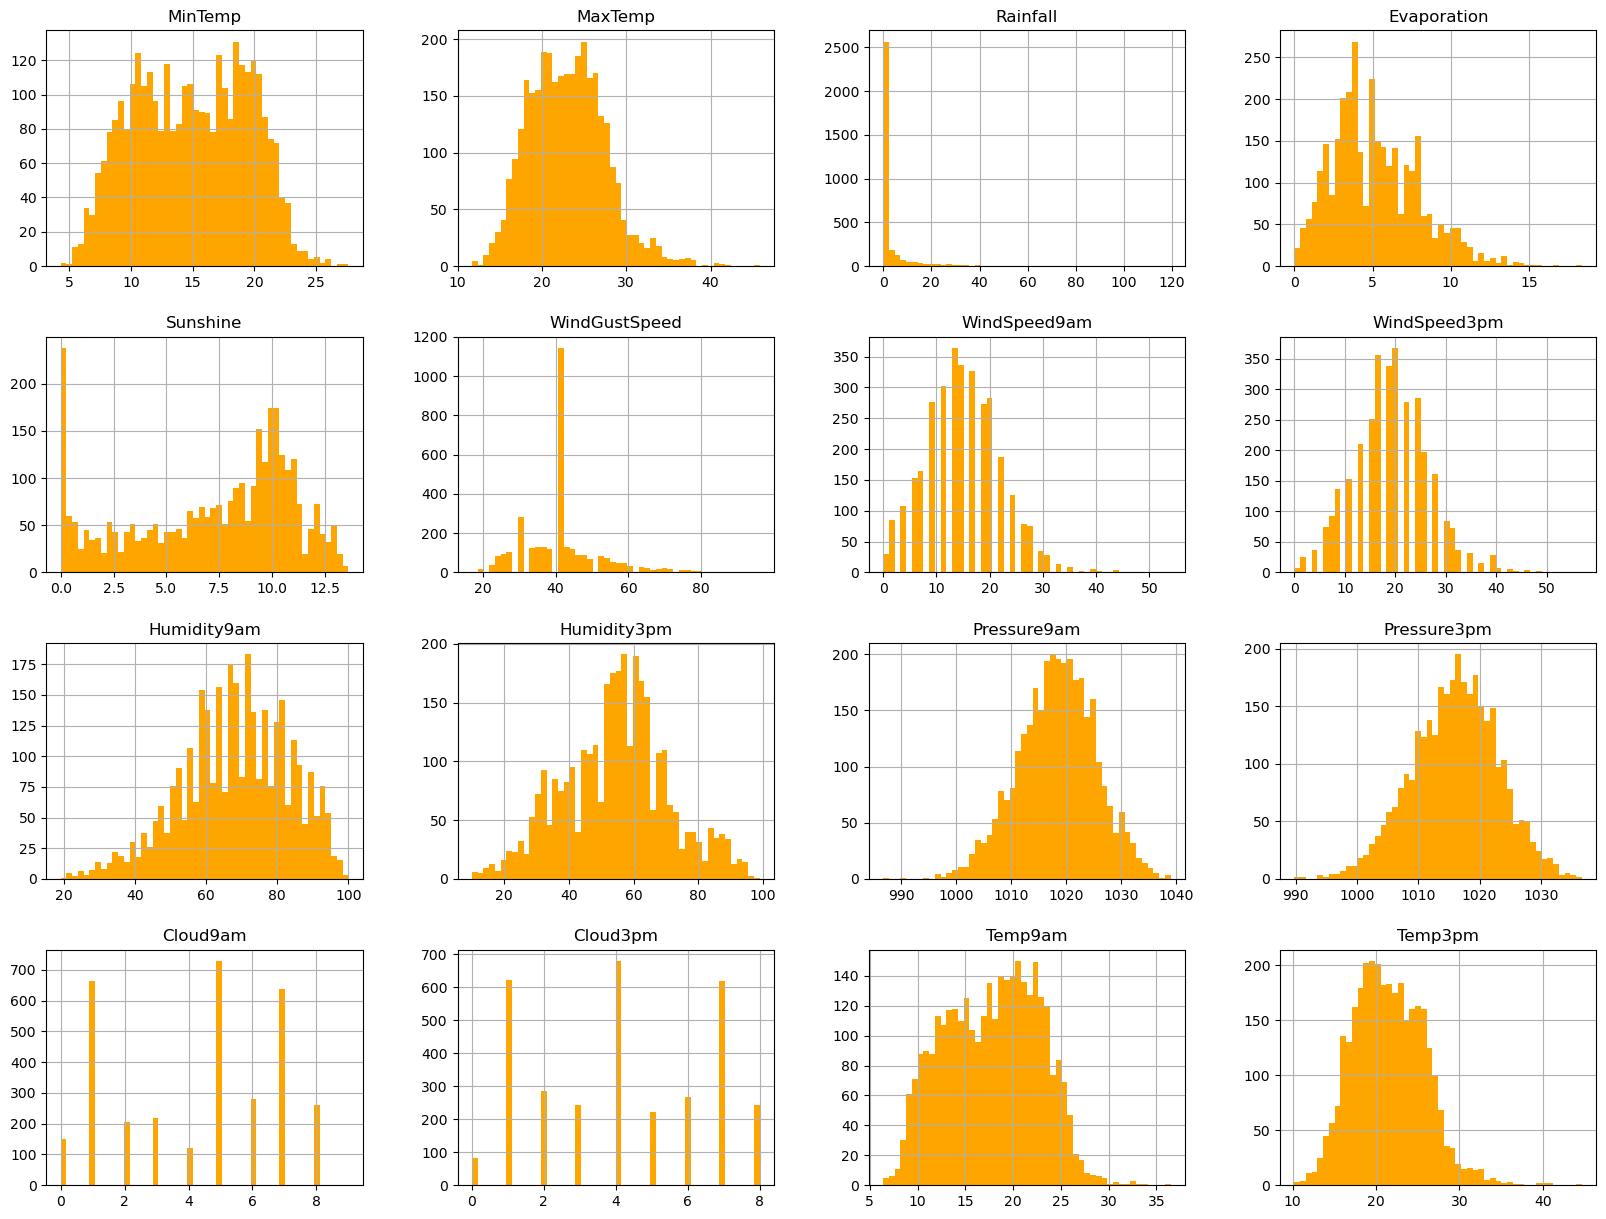

In [11]:
### Visualize the data
weather_df.hist(bins=50, figsize=(20,15), color='orange')
plt.show()

### Training Data and Test Data


Now, we set our 'features' or X values and our Y or target variable.


In [12]:
# features and target
X = weather_processed.drop(columns='RainTomorrow', axis=1)
y = weather_processed['RainTomorrow']

In [13]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.2,22.8,18.8,2.2,0.0,41.0,22.0,20.0,83.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3266    0.0
3267    0.0
3268    0.0
3269    0.0
3270    0.0
Name: RainTomorrow, Length: 3271, dtype: float64

### Linear Regression


Split the dataset into training data and testing data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state= 10)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2616, 66)
(655, 66)
(2616,)
(655,)


##### Creating and training a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [17]:
LinearReg = LinearRegression()
LinearReg.fit(X_train,y_train)

LinearRegression()

##### Now using the `predict` method on the testing data (`X_test`) and save it to the array `predictions`.


In [18]:
predictions = LinearReg.predict(X_test)

##### Using the `predictions` and the `y_test` dataframe calculate the value for each metric.


In [19]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test,predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test,predictions)
LinearRegression_R2 = metrics.r2_score(y_test,predictions)

In [20]:
Report1 = pd.DataFrame({'metrics': ['MAE','MSE','R2'],'value': [LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]})
Report1

,metrics,value
0,MAE,0.256325
1,MSE,0.115723
2,R2,0.427119


### KNN


##### Creating and training a KNN model called KNN using the training data (`X_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [21]:
KNN = KNeighborsClassifier(n_neighbors= 4)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

##### Now using the `predict` method on the testing data (`X_test`) and save it to the array `predictions`.


In [22]:
predictions = KNN.predict(X_test)

##### Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [23]:
KNN_Accuracy_Score = accuracy_score(y_test,predictions)
KNN_JaccardIndex = jaccard_score(y_test,predictions)
KNN_F1_Score = f1_score(y_test,predictions)

In [24]:
Report2 = pd.DataFrame({'metrics': ['Accuracy_Score','JaccardIndex','F1_Score'],'value': [KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score]})
Report2

,metrics,value
0,Accuracy_Score,0.818321
1,JaccardIndex,0.425121
2,F1_Score,0.596610


### Decision Tree


##### Creating and training a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [25]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train,y_train)

DecisionTreeClassifier()

##### Now useing the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [26]:
predictions = Tree.predict(X_test)

##### Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [27]:
Tree_Accuracy_Score = accuracy_score(y_test,predictions)
Tree_JaccardIndex = jaccard_score(y_test,predictions)
Tree_F1_Score = f1_score(y_test,predictions)

In [28]:
report3 = pd.DataFrame({'metrics':["Accuracy_Score","JaccardIndex","F1_Score"],'value': [Tree_Accuracy_Score,Tree_JaccardIndex,Tree_F1_Score]})
report3

,metrics,value
0,Accuracy_Score,0.760305
1,JaccardIndex,0.400763
2,F1_Score,0.572207


### Logistic Regression


##### Using the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state= 1)

##### Creating and training a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [30]:
LR = LogisticRegression(solver= 'liblinear')
LR.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

##### Now, use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [31]:
predictions = LR.predict(X_test)
predict_probab = LR.predict_proba(X_test)

##### Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [32]:
LR_Accuracy_Score = accuracy_score(y_test,predictions)
LR_JaccardIndex = jaccard_score(y_test,predictions)
LR_F1_Score = f1_score(y_test,predictions)
LR_Log_Loss = log_loss(y_test,predict_probab)

In [33]:
report4 = pd.DataFrame({'metrics':["Accuracy_Score","JaccardIndex","F1_Score","Log_loss"],'value': [LR_Accuracy_Score,LR_JaccardIndex,LR_F1_Score,LR_Log_Loss]})
report4

,metrics,value
0,Accuracy_Score,0.832061
1,JaccardIndex,0.497717
2,F1_Score,0.664634
3,Log_loss,0.380615


### SVM


##### Creating and training a SVM model called SVM using the training data (`X_train`, `y_train`).


In [34]:
SVM = svm.SVC(kernel= 'rbf')
SVM.fit(X_train,y_train)

SVC()

##### Now using the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [35]:
predictions = SVM.predict(X_test)

##### Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [36]:
SVM_Accuracy_Score = accuracy_score(y_test,predictions)
SVM_JaccardIndex = jaccard_score(y_test,predictions)
SVM_F1_Score = f1_score(y_test,predictions)

In [37]:
report5 = pd.DataFrame({'metrics':["Accuracy_Score","JaccardIndex","F1_Score"],'value': [SVM_Accuracy_Score,SVM_JaccardIndex,SVM_F1_Score]})
report5

,metrics,value
0,Accuracy_Score,0.722137
1,JaccardIndex,0.000000
2,F1_Score,0.000000


### Report


##### Showing the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [38]:
results = {'Model':['KNN','DecisionTree','LogisticRegression','SVM'],
           'Accuracy': [KNN_Accuracy_Score,Tree_Accuracy_Score,LR_Accuracy_Score,SVM_Accuracy_Score],
           'Jaccard Index':[KNN_JaccardIndex,Tree_JaccardIndex,LR_JaccardIndex,SVM_JaccardIndex],
           'F1-score': [KNN_F1_Score,Tree_F1_Score,LR_F1_Score,SVM_F1_Score],'Logloss':['N/A','N/A',LR_Log_Loss,'N/A']}
Report = pd.DataFrame(results)
Report

,Model,Accuracy,Jaccard Index,F1-score,Logloss
0,KNN,0.818321,0.425121,0.596610,N/A
1,DecisionTree,0.760305,0.400763,0.572207,N/A
2,LogisticRegression,0.832061,0.497717,0.664634,0.380615
3,SVM,0.722137,0.000000,0.000000,N/A
